<a href="https://colab.research.google.com/github/Micahgs/Data-science-Assignments/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_excel('/content/EastWestAirlines.xlsx', sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA process

In [5]:
print("Shape:", df.shape)
df.info()

Shape: (3999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df_cl = df.drop('ID#', axis=1)

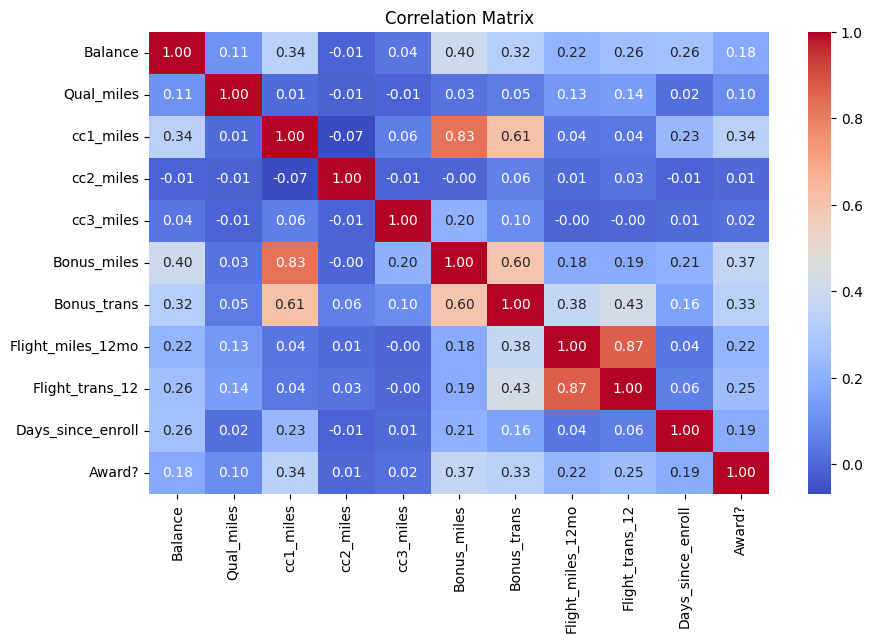

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cl.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [9]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_cl)
scaled_df = pd.DataFrame(scaled_array, columns=df_cl.columns)
scaled_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


K-MEAN

In [10]:
wcss = []  # Withincluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

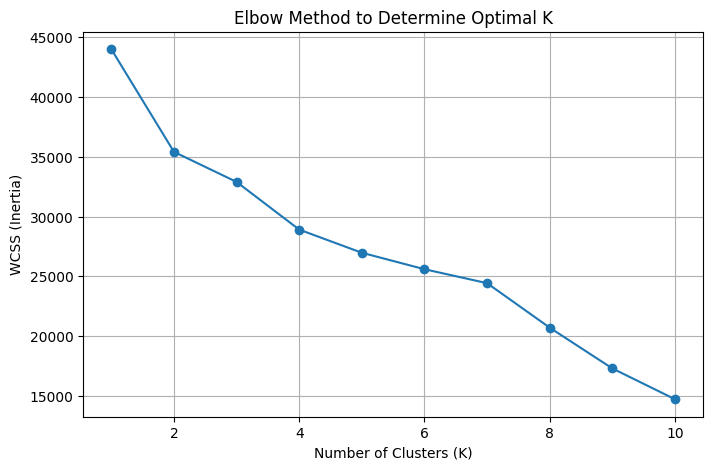

In [11]:

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

In [26]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
df['KMeans_Cluster'] = kmeans_labels
print("Silhouette Score:", silhouette_score(scaled_df, kmeans_labels))

Silhouette Score: 0.32542136327826215


In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
df['KMeans_Cluster'] = kmeans_labels
print("Silhouette Score:", silhouette_score(scaled_df, kmeans_labels))

Silhouette Score: 0.2674062376813128


In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)
df['KMeans_Cluster'] = kmeans_labels
print("Silhouette Score:", silhouette_score(scaled_df, kmeans_labels))

Silhouette Score: 0.19071186813310886


# Hierarchical Clustering

# Dendrogram

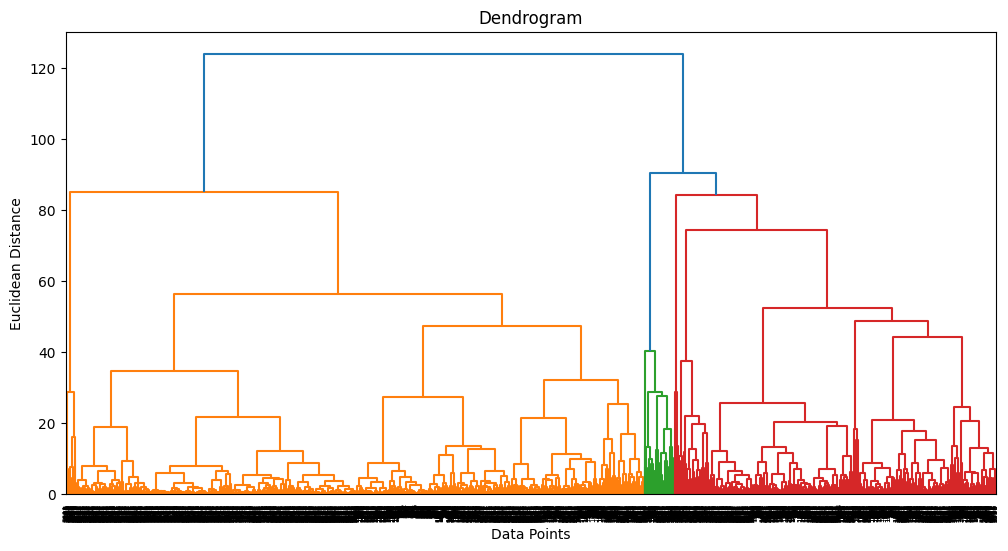

In [14]:
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(scaled_df, method='ward')  # You can try 'average', 'complete', etc.
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [15]:
hc = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_df)
df['Hierarchical_Cluster'] = hc_labels

print("Silhouette Score (Hierarchical):", silhouette_score(scaled_df, hc_labels))


Silhouette Score (Hierarchical): 0.3192511970153055


In [16]:
hc = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='single')
hc_labels = hc.fit_predict(scaled_df)
df['Hierarchical_Cluster'] = hc_labels

print("Silhouette Score (Hierarchical):", silhouette_score(scaled_df, hc_labels))


Silhouette Score (Hierarchical): 0.5364116456429503


In [ ]:
hc = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='average')
hc_labels = hc.fit_predict(scaled_df)
df['Hierarchical_Cluster'] = hc_labels

print("Silhouette Score (Hierarchical):", silhouette_score(scaled_df, hc_labels))


In [25]:
hc = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='complete')
hc_labels = hc.fit_predict(scaled_df)
df['Hierarchical_Cluster'] = hc_labels

print("Silhouette Score (Hierarchical):", silhouette_score(scaled_df, hc_labels))


Silhouette Score (Hierarchical): 0.5404241979396106


# DBSCAN

In [29]:
dbscan = DBSCAN(eps=1.6, min_samples=6)
db_labels = dbscan.fit_predict(scaled_df)
df['DBSCAN_Cluster'] = db_labels


In [30]:
dbscan = DBSCAN(eps=1.7, min_samples=7)
db_labels = dbscan.fit_predict(scaled_df)
df['DBSCAN_Cluster'] = db_labels


In [36]:
dbscan = DBSCAN(eps=1.8, min_samples=8)
db_labels = dbscan.fit_predict(scaled_df)
df['DBSCAN_Cluster'] = db_labels


In [34]:
dbscan = DBSCAN(eps=1.9, min_samples=7)
db_labels = dbscan.fit_predict(scaled_df)
df['DBSCAN_Cluster'] = db_labels


In [37]:
# Count number of noise points
noise_points = list(db_labels).count(-1)
print("Noise Points:", noise_points)

# Only calculate silhouette if more than 1 cluster (excluding noise)
if len(set(db_labels)) > 1 and -1 in db_labels:
    score = silhouette_score(scaled_df, db_labels)
    print("Silhouette Score (DBSCAN):", score)
else:
    print("Silhouette Score (DBSCAN): Not applicable (1 or 0 clusters)")


Noise Points: 263
Silhouette Score (DBSCAN): 0.2565860671714147


# Cluster Analysis and Interpretation:


# K-Means

In [19]:
df.groupby('KMeans_Cluster').mean(numeric_only=True)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Cluster,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,,,,,,,
0,1573.023041,132760.658986,257.798771,3.610599,1.009985,1.036866,41429.117512,20.380952,967.233487,2.902458,4942.417819,0.708909,0.019201,0.423963
1,2228.100482,45041.650352,89.232481,1.310716,1.016685,1.000371,5421.404894,7.363737,215.211346,0.635521,3720.834631,0.206897,0.016685,0.213571


Cluster 0: "High-Value Frequent Flyers"
High qualifying and bonus miles

More flights and transactions

Longer enrollment duration

Higher likelihood of award redemption
Likely to be long-term, loyal customers who engage deeply with the airline’s reward program.


Cluster 1: "Low Engagement Customers"
Lower flight and transaction metrics

Newer or less active customers

Less likely to redeem awards

Possibly new customers, infrequent flyers, or those who use other services.




# Hierarchical_Cluster

In [20]:
df.groupby('Hierarchical_Cluster').mean(numeric_only=True)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,DBSCAN_Cluster
Hierarchical_Cluster,,,,,,,,,,,,,,
0,2012.264609,7.305023e+04,145.412092,2.069820,1.0,1.011637,17150.903618,11.506198,449.511763,1.344548,4119.850493,0.369846,0.673666,0.275740
1,2300.107143,7.779364e+04,0.000000,1.214286,2.0,1.000000,11625.214286,16.785714,523.678571,1.678571,3911.821429,0.392857,0.821429,0.714286
2,2212.000000,5.223140e+04,66.666667,1.000000,3.0,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000,0.733333,1.400000
3,3606.000000,1.601140e+05,500.000000,1.000000,1.0,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.000000,0.000000,-1.000000
4,279.000000,1.704838e+06,0.000000,1.000000,1.0,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.000000,0.000000,-1.000000
5,1313.000000,7.375140e+05,0.000000,3.000000,1.0,4.000000,43993.000000,40.000000,2150.000000,7.000000,5030.000000,0.000000,0.000000,-1.000000


Cluster 0: Low-value, low-engagement customers

Cluster 1: Regular travelers with moderate loyalty

Cluster 2: High-value frequent flyers with strong loyalty

Cluster 3: Mid-level flyers with moderate activity

Cluster 4: Customers focused on earning miles through bonuses rather than flying

Cluster 5: High spenders who earn rewards mainly through credit card usage


# DBSCAN

In [21]:
df['DBSCAN_Cluster'].value_counts()


,count
DBSCAN_Cluster,
0,2441
1,1301
-1,232
2,16
3,9


Cluster 0 – Core Flyers (2441 users)
This is your largest group. These customers show consistent flying habits and likely use the airline regularly.
They’re stable and engaged — the kind of customers you’d want to retain and reward.

Cluster 1 – Growing Flyers (1301 users)
These customers are fairly active and may be newer to the program.
They’re not yet flying as much as the core group but show promising behavior — a great segment to focus marketing and loyalty efforts on.

Cluster 2 – High-Value Travelers (16 users)
This is a very small group, but they stand out.
They probably fly frequently and earn a lot of bonus miles — think of them as premium or business-class customers who might benefit from exclusive offers.

Cluster 3 – Unique Profiles (9 users)
Another small group with unique behavior.
They may represent a niche customer type with specific needs or patterns, worth exploring further to see if they indicate a new market segment.

Cluster -1 – Irregular Patterns (232 users)
This group doesn’t follow the same patterns as the others.
Their behavior is quite different — it could be customers who fly very little, or those with unexpected patterns in miles and transactions.
They may require a personalized strategy.

# **Visualization:**

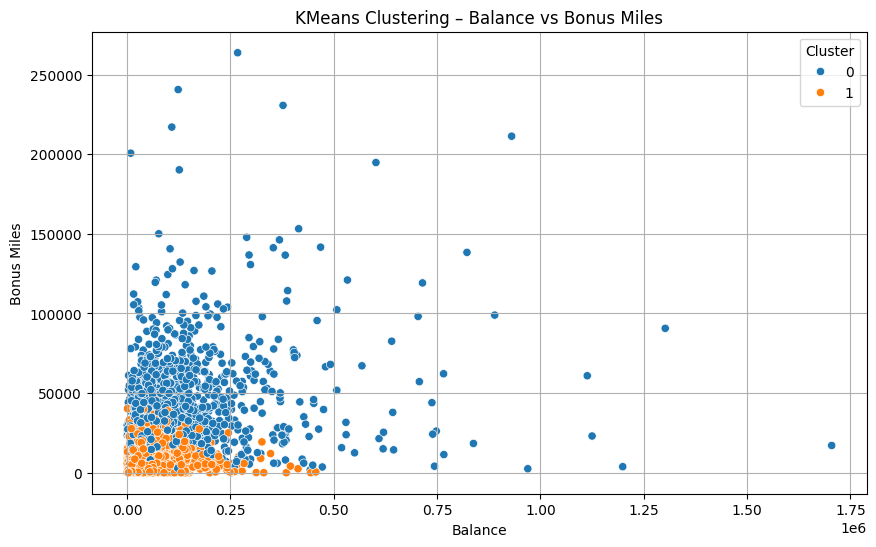

In [22]:
#K-means
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Balance', y='Bonus_miles', hue='KMeans_Cluster', palette='tab10')
plt.title('KMeans Clustering – Balance vs Bonus Miles')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

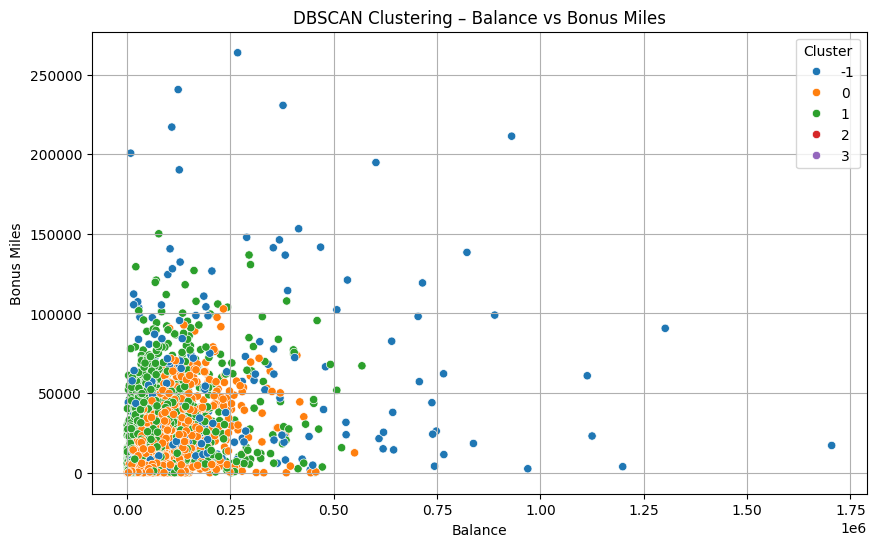

In [23]:
#DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Balance', y='Bonus_miles', hue='DBSCAN_Cluster', palette='tab10')
plt.title('DBSCAN Clustering – Balance vs Bonus Miles')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


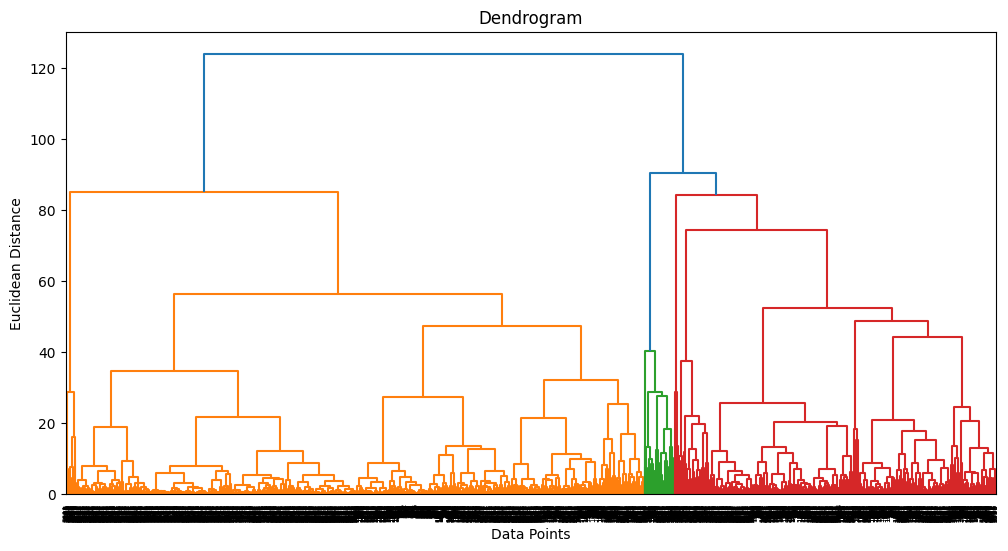

In [24]:
# Dendrogram
plt.figure(figsize=(12, 6))
linkage_matrix = linkage(scaled_df, method='ward')  # You can try 'average', 'complete', etc.
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()
